## Descomposición de la Serie de tiempo AUTP

##### Oscar Julian Layton

## Carga de datos

Para desarrollar una secuencia de pasos para el analisis de la serie de tiempo AUTP que hace parte de la base accidentes. Se hace necesario usar **R** como herramienta computacional, en un primer paso se necesitaran de las siguientes librerias las cuales ayudaran para cargar los datos. 

In [5]:
library(readr)
library(readxl)
Base_Accidentes <- read_excel("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\series de tiempo\\codigos\\Base_Accidentes.xlsx")

Para obtener la serie, se convierte la informacion en un objeto de series de tiempo con la siguiente linea, asi mismo se procede a realizar su representacion grafica:

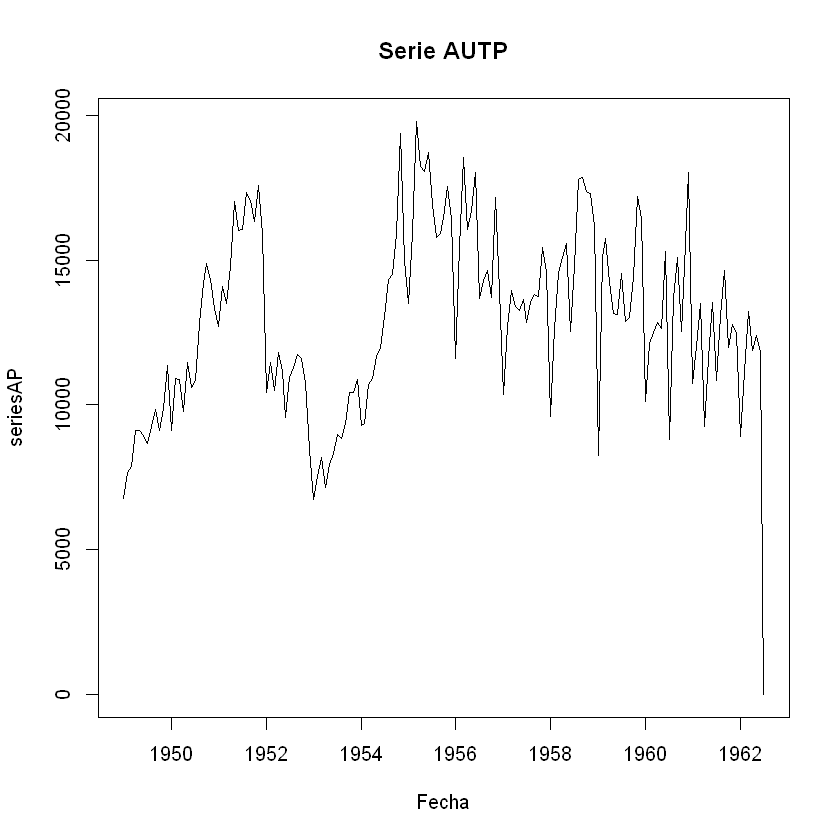

In [6]:
seriesAP=ts(Base_Accidentes$AUTP,start=c(1949,1),frequency=12)
plot(seriesAP, main="Serie AUTP", xlab="Fecha")

Observando la anterior, claramente la serie no es estacionaria, puesto que no tiene ningun patron, la serie no tiene una media constante al transcurrir los años **"la media no es la misma a lo largo del tiempo"**, asi mismo se logra observar una tendencia en los primeros años la cual decrece aproximadamente en los ultimos años.

# Descomposicion basada promedios moviles

Para el proceso estocastico AUTP $\{  X_t \}$ no estacionario, existen diversas estrategias para convertirlo en un proceso $\{  Y_t \}$ estacionario, se propone desarrollar el metodo de descomposicion basado en filtros el cual consiste en estimar los componentes de $\{  X_t \}$ de la siguiente forma:

$$X_t = M_t + S _t + Y_t$$


Donde llamaremos a $M_t$ el componente de tendencia, a $S_t$ la componente estacional, la filosofia consiste en estimar estas componentes y luego restarlas al proceso no estacionario para convertirlo en $Y_t$ el cual es estacionario.

### Desarrollo

En referencia a la serie de tiempo, se logra observar que a traves del tiempo la varianza alcanza a aumentar, dado lo anterior se ve la necesidad de estabilixar la varianza, en este orden de ideas se usara la transformacion **Box-Cox** el cual transforma los datos de la serie segun un lambda especifico el cual logre homogeneizar la varianza, dicha transformacion tiene la forma:

$$
f_x(U_t)=\left\{\begin{matrix}
 \lambda^-1 (U^{\lambda}_t - 1) & U_t\geq 0 & \lambda>0\\ 
Ln (U_t) & U_t >0 & \lambda=0
\end{matrix}\right.
$$


Este procedimiento puede ser usaro rapidamente en R por medio del siguiente codigo:


In [10]:
library(forecast)
forecast::BoxCox.lambda(seriesAP, method = "guerrero", lower = 0, upper = 2)  

[1] 1.179212

Por consiguiente el valor de lambda es cercano a 1, en este orden de ideas lo mas aconsejable es no realizar una transformacion a los datos, en otras palabras no es necesario estabilizar la varianza:

Como segundo paso, se realiza propiamente el proceso basado en promedios moviles

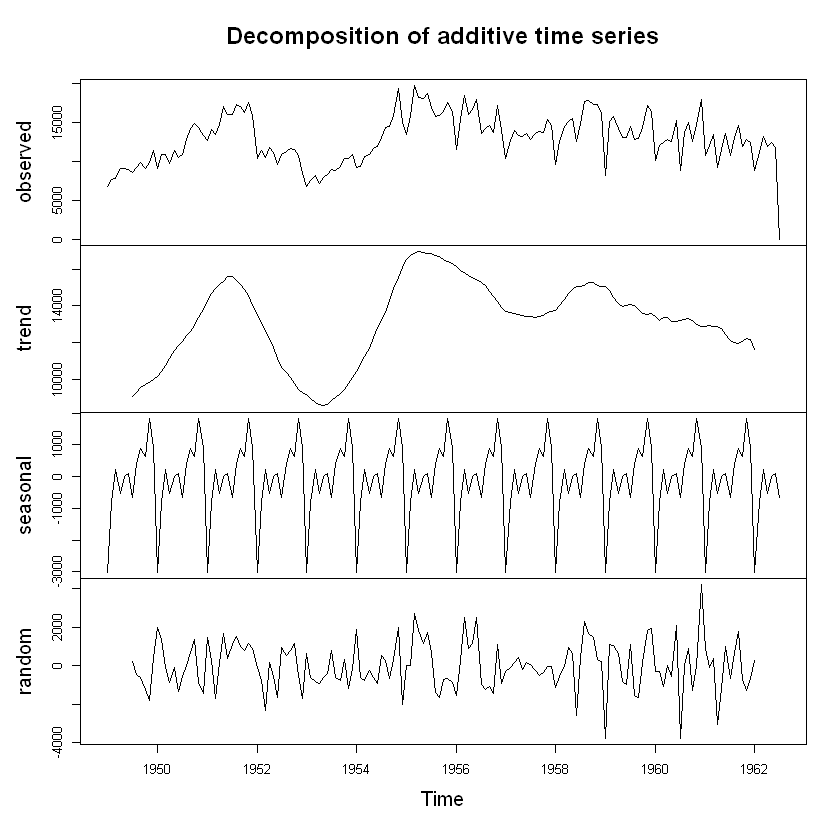

In [11]:
deslAirPass=decompose(seriesAP)
plot(deslAirPass)

En la grafica anterior puede observarse el resumen del proceso de descomposicion realizado, mostrandose en la primera grafica la serie original sin transformar, en la segunda grafica puede observar la componente de tendencia de la serie, en la tercera serie se identifica la componente estacional y en la última serie se puede observar los residuos $Y_t$  la cual es estacional.


## Análisis de la serie resultante estacionaria

Para observar si la serie $Y_t$ la cual corresponde a los residuos tiene alguna estructura de correlación, se analizan los residuos:

Hay que tener en cuenta que mediante el proceso de promedios moviles se generan observaciones faltantes, (datos faltantes) lo cual podra observarse mediante el siguiente comando:

[1] 163

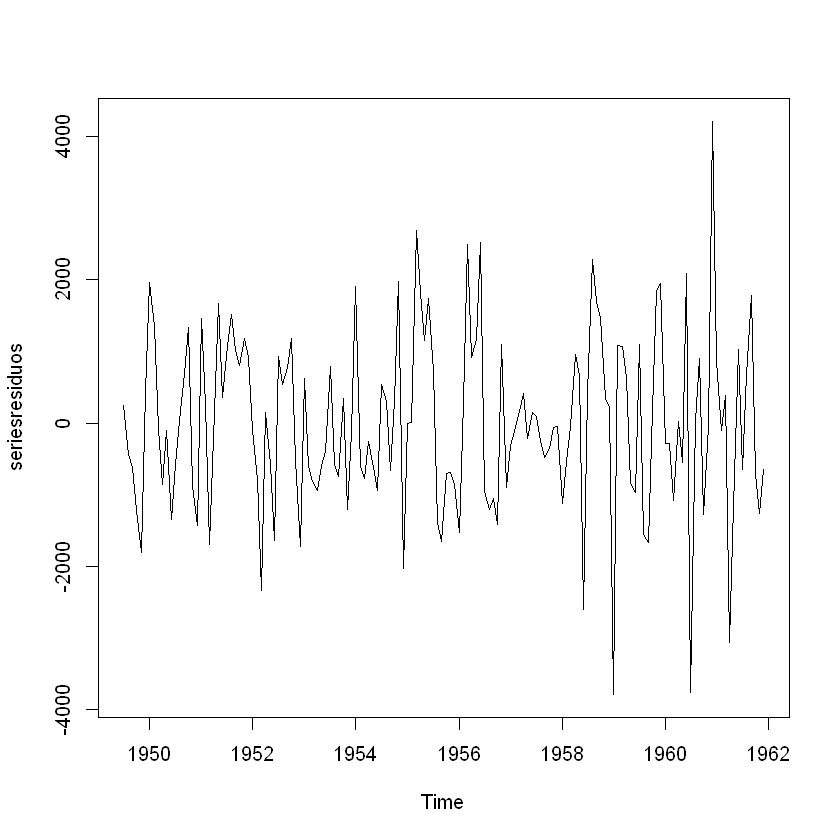

In [12]:
length(deslAirPass$random)
residuos<-deslAirPass$random[7:(163-7)]
seriesresiduos=ts(residuos,start=c(1949,7),frequency=12)
plot(seriesresiduos)

La anterior gráfica muestra la serie estacionaria $y_t$ la cual mediante el proceso de promedios móviles son los residuos quitandosele los datos faltantes.

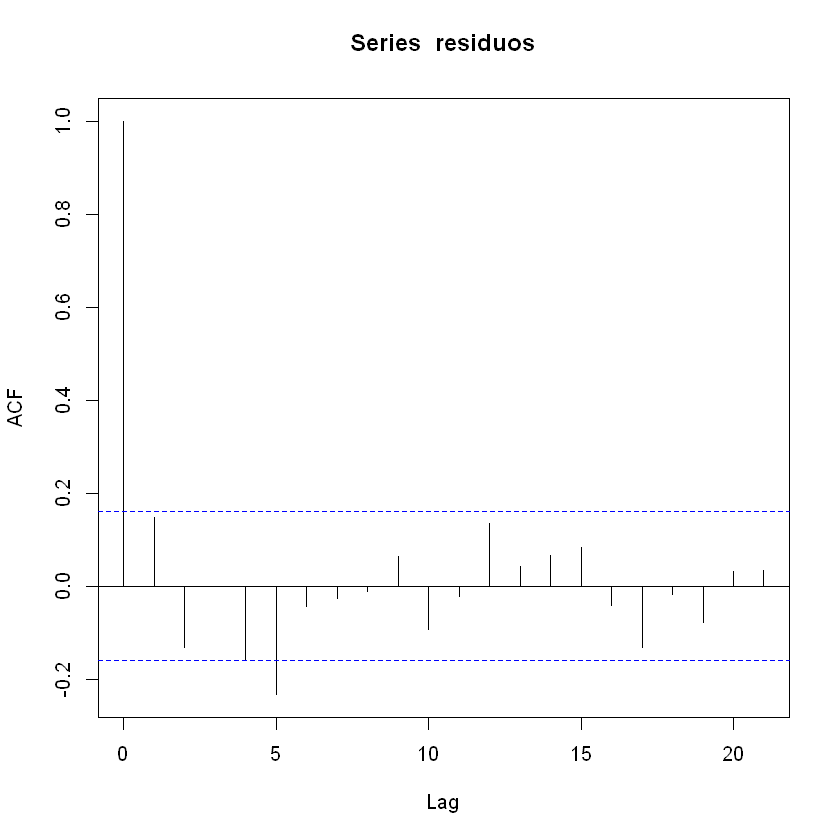

In [13]:
acf(residuos)

En la grafica de la función de autocorrelación simple puede observarse que solamente para el rezago 5 la correlacion se sale de las bandas de confianza lo que indica que es significativa para el proceso, es decir no es cero. Finalmente el proceso realizado para volver una serie de tiempo a una estacionaria es buena, el modelo para la serie estaría determinado por un modelo estacional **ARMA(p,q)**.

$$X_t - M_t - S _t = Y_t$$